In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import seaborn as sns 
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [3]:

from collections import Counter

In [4]:

data = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
print(data)


      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [5]:
print(data.shape) 

(2823, 25)


In [6]:
print(data.isnull().sum() )

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [7]:
data.drop(["ORDERNUMBER", "PRICEEACH", "ORDERDATE", "PHONE", "ADDRESSLINE1", "ADDRESSLINE2", "CITY", "STATE", "TERRITORY", "POSTALCODE", "CONTACTLASTNAME", "CONTACTFIRSTNAME"], axis = 1, inplace=True) 
print(data.head() )
print(data.isnull().sum() )
print(data.describe() )


   QUANTITYORDERED  ORDERLINENUMBER    SALES   STATUS  QTR_ID  MONTH_ID  \
0               30                2  2871.00  Shipped       1         2   
1               34                5  2765.90  Shipped       2         5   
2               41                2  3884.34  Shipped       3         7   
3               45                6  3746.70  Shipped       3         8   
4               49               14  5205.27  Shipped       4        10   

   YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE              CUSTOMERNAME COUNTRY  \
0     2003  Motorcycles    95    S10_1678         Land of Toys Inc.     USA   
1     2003  Motorcycles    95    S10_1678        Reims Collectables  France   
2     2003  Motorcycles    95    S10_1678           Lyon Souveniers  France   
3     2003  Motorcycles    95    S10_1678         Toys4GrownUps.com     USA   
4     2003  Motorcycles    95    S10_1678  Corporate Gift Ideas Co.     USA   

  DEALSIZE  
0    Small  
1    Small  
2   Medium  
3   Medium  
4   Mediu

<Axes: xlabel='STATUS', ylabel='count'>

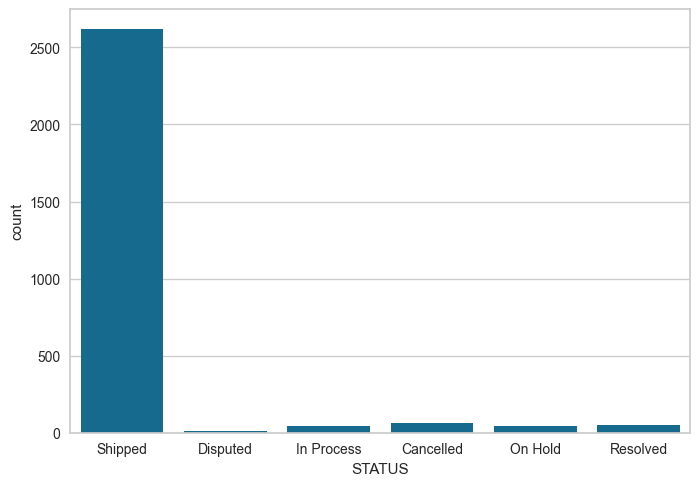

In [8]:
sns.countplot(data = data , x = 'STATUS') 

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

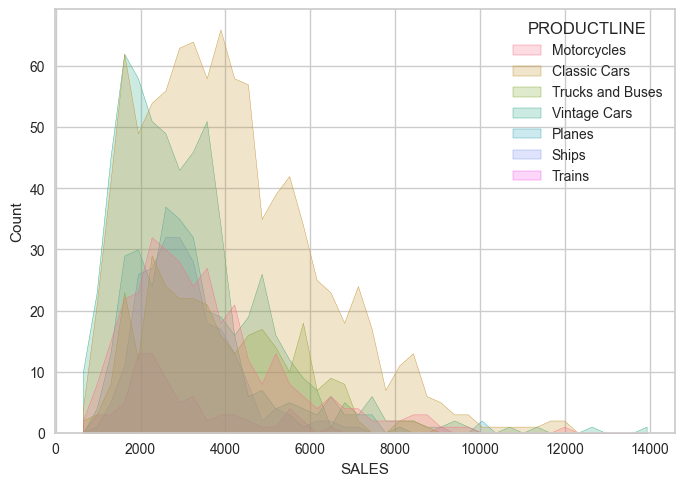

In [9]:
sns.histplot(x = 'SALES' , hue = 'PRODUCTLINE', data = data,element="poly") 
data['PRODUCTLINE'].unique() 

In [10]:
data.drop_duplicates(inplace=True) 


In [11]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   object 
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(6), object(6)
memory usage: 286.8+ KB


In [12]:
list_cat = data.select_dtypes(include=['object']).columns.tolist() 
list_cat 

['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE']

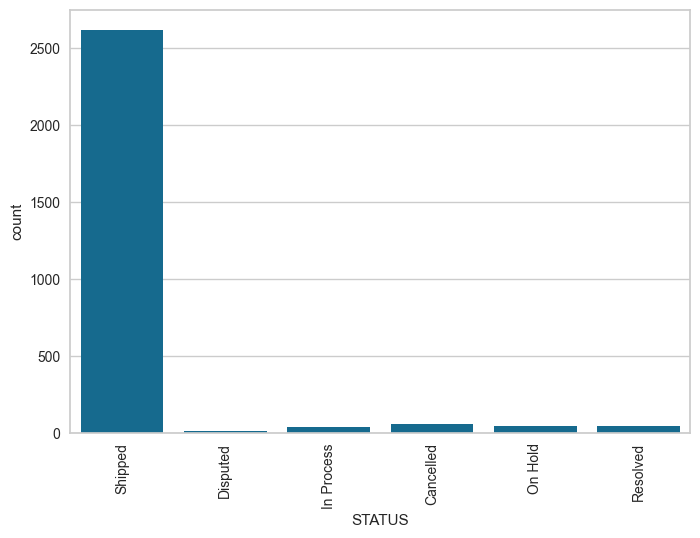

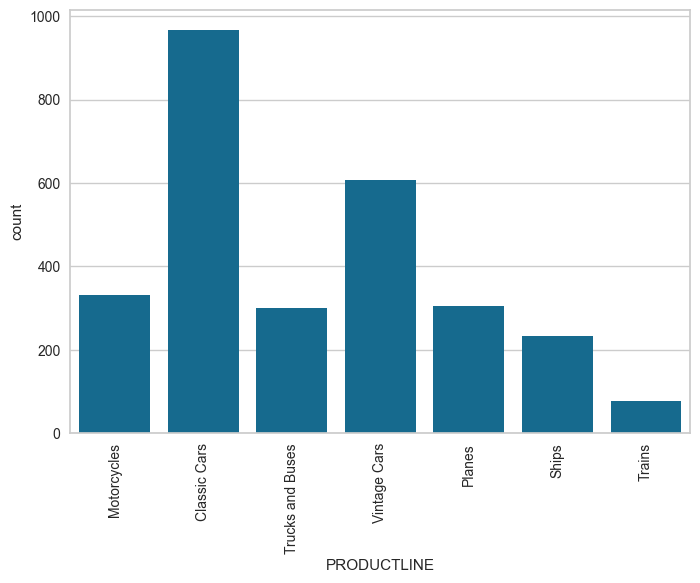

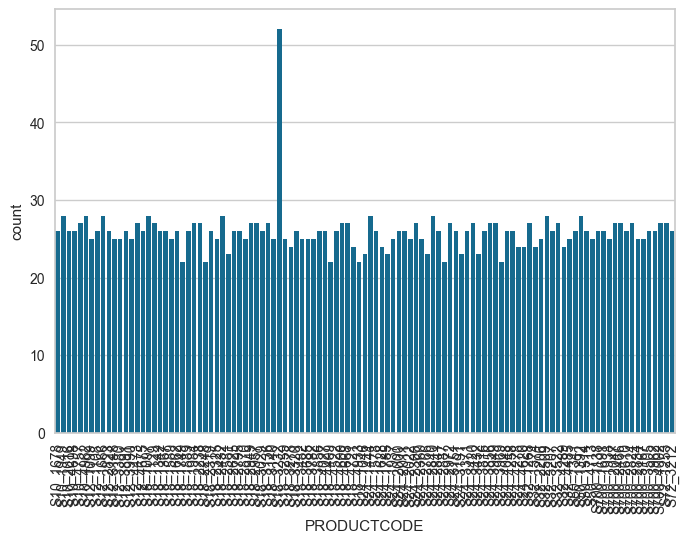

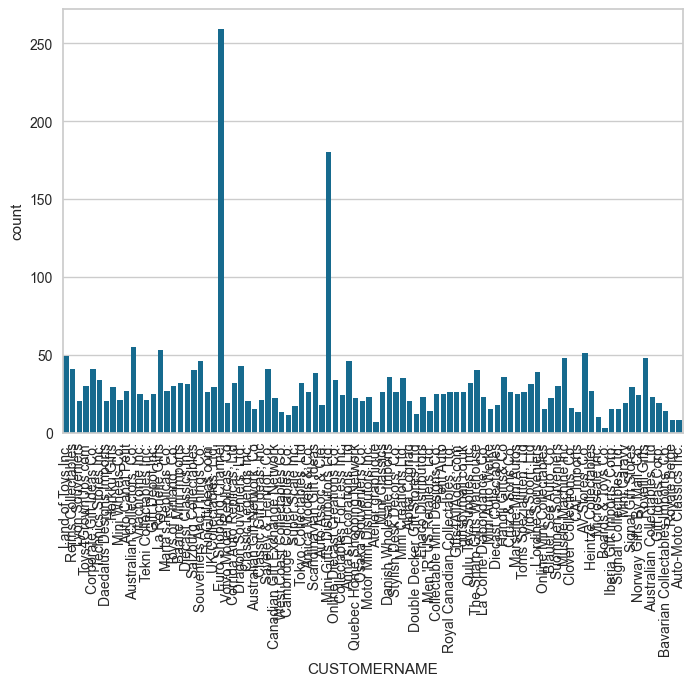

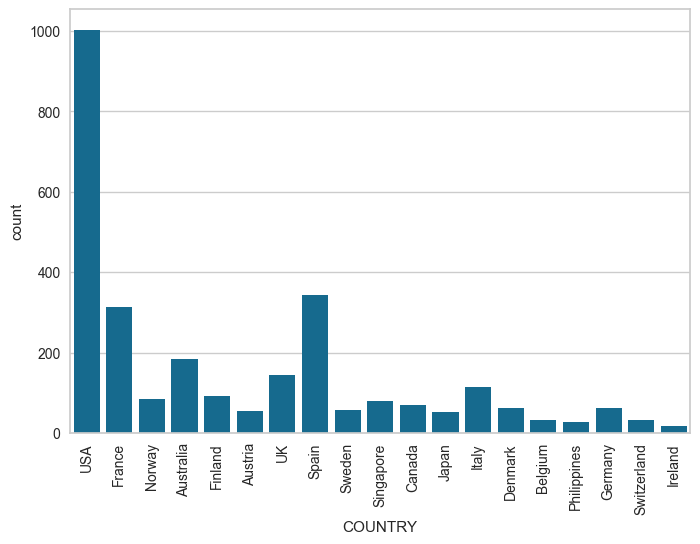

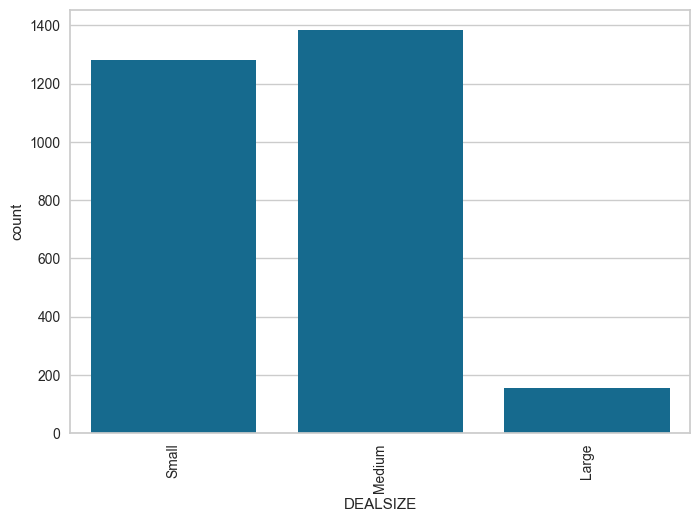

In [13]:
for i in list_cat:  
    sns.countplot(data = data ,x = i)
    plt.xticks(rotation = 90)   
    plt.show()

In [14]:
le = preprocessing.LabelEncoder() 

In [15]:

for i in list_cat:
    data[i]= le.fit_transform(data[i]) 

In [16]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   ORDERLINENUMBER  2823 non-null   int64  
 2   SALES            2823 non-null   float64
 3   STATUS           2823 non-null   int32  
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   int32  
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   int32  
 10  CUSTOMERNAME     2823 non-null   int32  
 11  COUNTRY          2823 non-null   int32  
 12  DEALSIZE         2823 non-null   int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 220.7 KB


In [17]:
data['SALES'] = data['SALES'].astype(int) 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   QUANTITYORDERED  2823 non-null   int64
 1   ORDERLINENUMBER  2823 non-null   int64
 2   SALES            2823 non-null   int32
 3   STATUS           2823 non-null   int32
 4   QTR_ID           2823 non-null   int64
 5   MONTH_ID         2823 non-null   int64
 6   YEAR_ID          2823 non-null   int64
 7   PRODUCTLINE      2823 non-null   int32
 8   MSRP             2823 non-null   int64
 9   PRODUCTCODE      2823 non-null   int32
 10  CUSTOMERNAME     2823 non-null   int32
 11  COUNTRY          2823 non-null   int32
 12  DEALSIZE         2823 non-null   int32
dtypes: int32(7), int64(6)
memory usage: 209.6 KB


In [18]:
data.describe() 

,QUANTITYORDERED,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,6.466171,3553.421537,4.782501,2.717676,7.092455,2003.81509,2.515055,100.715551,53.773291,46.212186,12.029401,1.398512
std,9.741443,4.225841,1841.865754,0.879416,1.203878,3.656633,0.69967,2.411665,40.187912,31.585298,24.936147,6.169774,0.592498
min,6.000000,1.000000,482.000000,0.000000,1.000000,1.000000,2003.00000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,3.000000,2203.000000,5.000000,2.000000,4.000000,2003.00000,0.000000,68.000000,27.000000,29.000000,6.000000,1.000000
50%,35.000000,6.000000,3184.000000,5.000000,3.000000,8.000000,2004.00000,2.000000,99.000000,53.000000,45.000000,14.000000,1.000000
75%,43.000000,9.000000,4508.000000,5.000000,4.000000,11.000000,2004.00000,5.000000,124.000000,81.000000,67.000000,18.000000,2.000000
max,97.000000,18.000000,14082.000000,5.000000,4.000000,12.000000,2005.00000,6.000000,214.000000,108.000000,91.000000,18.000000,2.000000


In [19]:
X = data[['SALES','PRODUCTCODE']] 
data.columns 


Index(['QUANTITYORDERED', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'CUSTOMERNAME', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

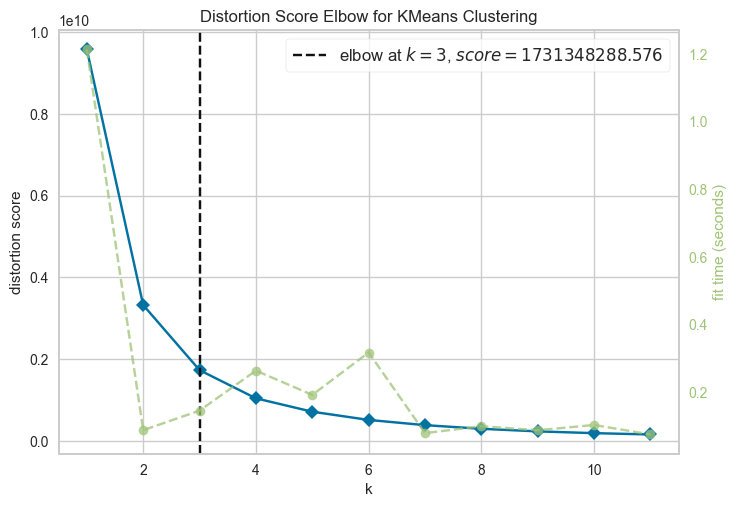

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Counter({0: 1038, 3: 1023, 1: 563, 2: 199})

In [20]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show() 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(X)
kmeans.labels_  
 
kmeans.inertia_ 
 
kmeans.n_iter_
kmeans.cluster_centers_ 
 

Counter(kmeans.labels_) 

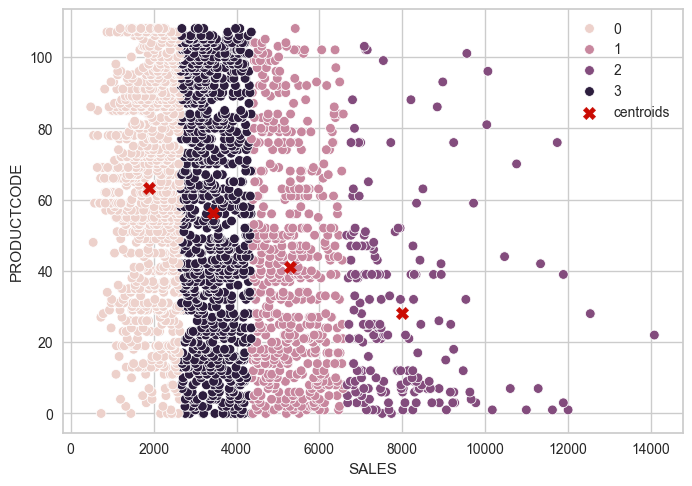

In [21]:
sns.scatterplot(data=X, x="SALES", y="PRODUCTCODE", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show() 